In [1]:
#import csv file and view
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fifa = pd.read_csv("next_phase.csv", index_col=0)
pd.set_option("max_columns", None)

In [2]:
#features
fifa2 =fifa.iloc[:, fifa.columns.get_loc('Crossing'): fifa.columns.get_loc('SlidingTackle')].copy()

In [3]:
pos = fifa['Position'].unique().tolist()

In [4]:
fifa2['Position'] = fifa['Position']
fifa2['Wage(in k)'] = fifa['Wage']
fifa2['Overall'] = fifa['Overall']

#### "Position", "Wage(in k)", "Overall" are target variable

In [5]:
fifa2.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,Position,Wage(in k),Overall
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,RF,565,94
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,ST,405,94
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,LW,290,92
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,GK,260,91
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,RCM,355,91


In [6]:
#check for NULL entries
fifa2.isnull().sum()

Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
Position           0
Wage(in k)         0
Overall            0
dtype: int64

[Text(0.5, 1.0, 'data correlation')]

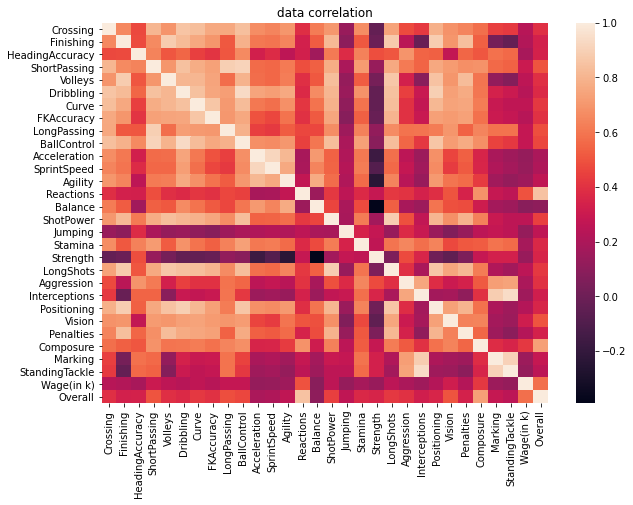

In [7]:
#visualization of data correlation
fig, axis = plt.subplots(figsize=(10,7))
sns.heatmap(fifa2.corr()).set(title="data correlation")

In [8]:
#reduce the dimention of features
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
data = pca.fit_transform(fifa2.values[:,:-3])
data

array([[-1.44584110e+02, -8.09388797e+01,  7.83078505e+00, ...,
        -1.48910879e+01, -7.09244619e+00,  3.34772661e+00],
       [-1.40765965e+02, -6.07092083e+01,  3.55053847e+01, ...,
        -5.59405256e-01, -7.96937913e+00,  3.55785917e+00],
       [-1.31021499e+02, -7.47163657e+01, -1.30984872e+00, ...,
         8.08218711e-02, -7.03848501e+00, -3.33348278e+00],
       ...,
       [ 5.73352620e+01, -4.89038004e+01, -7.75110634e+00, ...,
         1.08126994e+00,  7.19922041e+00, -2.36298598e+00],
       [ 4.96186044e+01, -4.86019644e+01, -5.77747970e+00, ...,
        -4.59757869e+00,  1.01848149e+01,  1.07092966e+01],
       [ 4.86860128e+01,  3.73984259e+00, -5.90312228e+00, ...,
        -1.83001996e+00,  3.30528477e+00,  3.91961532e+00]])

### prediction of "Position" using k-nearest neighbors algorithm

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, fifa2['Position'], stratify=fifa2['Position'])
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)
pred = knn.predict(x_train)
pred_test = knn.predict(x_test )
tr_sc = f1_score(y_train, pred, average='micro')
te_sc = f1_score(y_test, pred_test, average='micro')
print("Training F1_score: ", tr_sc)
print("Test F1_score: ", te_sc)

Training F1_score:  0.5664184661206255
Test F1_score:  0.4985481349117713


### prediction of "Position" using deep learning

In [10]:
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.utils import np_utils

In [11]:
#replace categorical varible with numerical values
fifa2['Position'] = fifa2['Position'].replace(pos, [i for i in range(len(pos))])

In [12]:
data = fifa2.values[:,:-3].astype(np.float32)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, fifa2['Position'], random_state=21, stratify=fifa2['Position'])

In [14]:
#encode target variable
y_train=np_utils.to_categorical(y_train,num_classes=len(pos))
y_test=np_utils.to_categorical(y_test,num_classes=len(pos))
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (13430, 27)
Shape of y_test (4477, 27)


In [15]:
#Define Keras Model
model=Sequential()
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(pos),activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
#fit the model with training data
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=5,epochs=10,verbose=1)

Epoch 1/10
2686/2686 [==============================] - 28s 10ms/step - loss: 1.9597 - accuracy: 0.4270 - val_loss: 1.5014 - val_accuracy: 0.5106
Epoch 2/10
2686/2686 [==============================] - 26s 10ms/step - loss: 1.5628 - accuracy: 0.4825 - val_loss: 1.5379 - val_accuracy: 0.4948
Epoch 3/10
2686/2686 [==============================] - 28s 10ms/step - loss: 1.5238 - accuracy: 0.4904 - val_loss: 1.4564 - val_accuracy: 0.5162
Epoch 4/10
2686/2686 [==============================] - 28s 10ms/step - loss: 1.4912 - accuracy: 0.4983 - val_loss: 1.4524 - val_accuracy: 0.5008
Epoch 5/10
2686/2686 [==============================] - 25s 9ms/step - loss: 1.4787 - accuracy: 0.5017 - val_loss: 1.4700 - val_accuracy: 0.5028
Epoch 6/10
2686/2686 [==============================] - 27s 10ms/step - loss: 1.4790 - accuracy: 0.4998 - val_loss: 1.4254 - val_accuracy: 0.5052
Epoch 7/10
2686/2686 [==============================] - 27s 10ms/step - loss: 1.4639 - accuracy: 0.5060 - val_loss: 1.4055 - 

In [17]:
#prediction on the test set
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

score = f1_score(y_label, predict_label, average='micro')
print("F1_score of the test set: ",score )

F1_score of the test set:  0.5030154121063212


### prediction of "Overall" using Decision Tree

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data, fifa2['Overall'])
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("Training accuracy score ", dt.score(x_train, y_train))
print("Test accuracy score: ", dt.score(x_test, y_test))
score = mean_squared_error(y_test, y_pred, squared=False)
print("rmse of test set: ", score)

Training accuracy score  0.928816710377199
Test accuracy score:  0.8660212971125673
rmse of test set:  2.5133712787163165


### prediction of "Wage(in k)" using LinearRegression

In [19]:
#split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(data, fifa2['Wage(in k)'])

In [20]:
#prediction using Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_train)
pred_test = lr.predict(x_test)
print("R2 Score of test set: ", r2_score(y_test, pred_test))
sc1 = mean_squared_error(y_train, pred, squared=False)
sc2 = mean_squared_error(y_test, pred_test, squared=False)
print("rmse of training set: ", sc1)
print("rmse of test set: ", sc2)

R2 Score of test set:  0.2685067464393175
rmse of training set:  18.491399123652425
rmse of test set:  19.87479377185893


### prediction of "Wage(in k)" using Deep learning

In [21]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import RootMeanSquaredError 

In [22]:
standard_scaler = StandardScaler()
x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train)
  )
x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test)
  )

In [23]:
hidden_units1 = 160*2
hidden_units2 = 480*2
hidden_units3 = 256*2
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [24]:

model.compile(
    loss='mse', 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[RootMeanSquaredError()]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=20, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/20
168/168 [==============================] - 3s 15ms/step - loss: 322.0677 - root_mean_squared_error: 17.9462 - val_loss: 192.9581 - val_root_mean_squared_error: 13.8909
Epoch 2/20
168/168 [==============================] - 3s 15ms/step - loss: 276.5728 - root_mean_squared_error: 16.6305 - val_loss: 173.7354 - val_root_mean_squared_error: 13.1809
Epoch 3/20
168/168 [==============================] - 4s 22ms/step - loss: 290.2038 - root_mean_squared_error: 17.0354 - val_loss: 244.3061 - val_root_mean_squared_error: 15.6303
Epoch 4/20
168/168 [==============================] - 3s 20ms/step - loss: 287.8371 - root_mean_squared_error: 16.9658 - val_loss: 168.7816 - val_root_mean_squared_error: 12.9916
Epoch 5/20
168/168 [==============================] - 3s 19ms/step - loss: 255.3721 - root_mean_squared_error: 15.9804 - val_loss: 181.2042 - val_root_mean_squared_error: 13.4612
Epoch 6/20
168/168 [==============================] - 3s 15ms/step - loss: 246.6115 - root_mean_squared_e

In [25]:
predictions = model.predict(x_test_scaled)

In [26]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
sc = K.eval(root_mean_squared_error(y_test, predictions.reshape(-1)))
print("test set R2 accuracy: ", r2_score(y_test, predictions.reshape(-1)))
print("test set root mean squared error: ", sc)

test set R2 accuracy:  0.5611279894742247
test set root mean squared error:  15.394529157449803
